Celem tych zajęć było zmaksymalizowanie zysków przy danych zasobach dla firmy sprzedających okna:
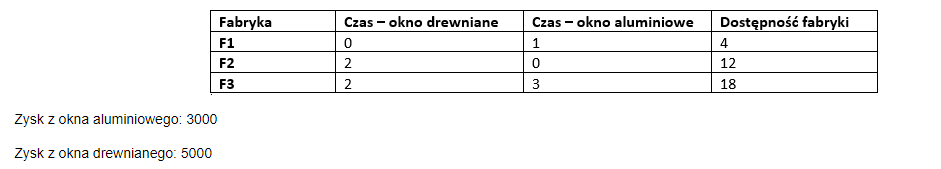

In [ ]:
from pulp import *
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, FloatSlider, IntSlider
import ipywidgets as widgets
import pandas as pd

style = {'description_width': 'initial'}

zysk_aluminium_slider = IntSlider (min=0,max = 10000, value= 3000, description="zysk_okna_aluminium", style = style)
zysk_drewna_slider    = IntSlider (min=0,max = 10000, value= 5000, description="zysk_okna_drewno",  style = style)
max_Fabryka_1_slider  = IntSlider (min=0,max = 20,    value= 4,    description="max_dostepnosc1",        style = style)
max_Fabryka_2_slider  = IntSlider (min=0,max = 20,    value= 12,   description="max_dostepnosc2",        style = style)
max_Fabryka_3_slider  = IntSlider (min=0,max = 20,    value= 18,   description="max_dostepnosc3",        style = style)

def produckja_okien( 
    zysk_aluminium= 3000,
    zysk_drewna = 5000,
    dostepnosc1 = 4,
    dostepnosc2 = 12,
    dostepnosc3 = 18):
    
    prob = LpProblem("Windows Problem",LpMaximize)

    x1 = LpVariable("Okna aluminiowe",0,None,LpInteger)       
    x2 = LpVariable("Okna drewniane",0,None,LpInteger)

    prob += zysk_aluminium*x1 + zysk_drewna*x2, "Zysk"

    prob += x1 <= dostepnosc1, "Fabryka 1"
    prob += x2*2 <= dostepnosc2, "Fabryka 2"
    prob += x1*3 + x2*2 <= dostepnosc3, "Fabryka 3"

    prob.solve()
    print("Status:", LpStatus[prob.status],)

    for v in prob.variables():
      print(v.name, "=", int(v.varValue))
    print("Profit =",value(prob.objective),"zł")

    shadows = [{'name':name, 'shadow price': c.pi, "slack": c.slack} for name, c in prob.constraints.items()]
    print("*"*10+"Shadow Prices"+"*"*10)
    print(pd.DataFrame(shadows))

interact(produckja_okien,
    zysk_aluminium= zysk_aluminium_slider,
    zysk_drewna = zysk_drewna_slider,
    dostepnosc1 = max_Fabryka_1_slider,
    dostepnosc2 = max_Fabryka_2_slider,
    dostepnosc3 = max_Fabryka_3_slider)